<a href="https://colab.research.google.com/github/Kyalo-oss/TelcoCustomerChurn/blob/main/Telco_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
This project identify the factors that drive churn at a telecommunications company. It has patterns between customers who appear increasingly likely to churn, which can offer valuable insights as to what course of action should be taken in the future to increase overall retention. At each step, we will strive to inform policy decisions with thoughtful and comprehensive analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Telco_df = pd.read_csv("/Telco_Customer_Churn.csv")

Telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
Telco_df.shape

(7043, 21)

In [ ]:
Telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Changing 'TotalCharges'column to a Float
Telco_df['TotalCharges'] = pd.to_numeric(Telco_df['TotalCharges'], errors='coerce').astype(float)

In [ ]:
# Checking Number of Null Values
Telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Removing Null Values from the Data Df
Telco_df = Telco_df.dropna()

In [ ]:
# Rechecking for Null values
Telco_df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


##**Explatory Data Analysis**

we begin by examining the distribution of customer churn across the dataset. A count plot is utilized to visualize the number of customers in each churn category ('Churn' or 'No Churn'). Additionally, churn percentages are calculated to quantify the proportion of customers in each churn category, providing an initial overview of the dataset's churn dynamics.


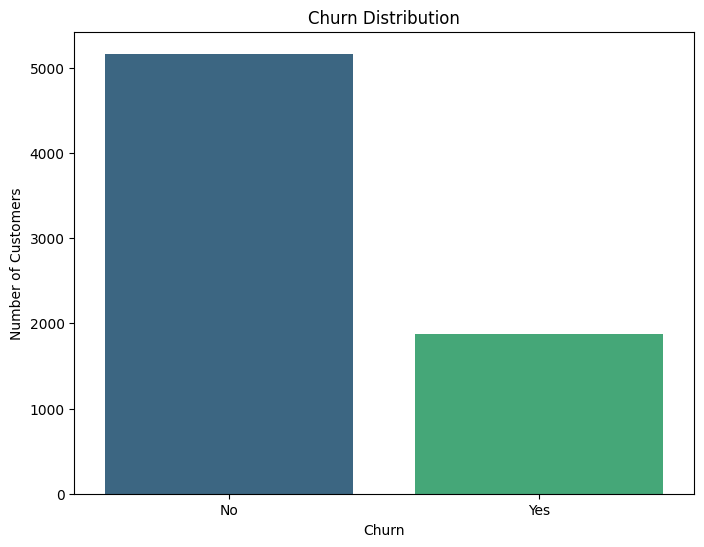

Churn Percentage:
No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


In [ ]:
# Churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', hue='Churn', data=Telco_df, palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

# Calculate churn percentage
churn_percentage = Telco_df['Churn'].value_counts(normalize=True) * 100
print("Churn Percentage:")
print(churn_percentage)


As we can see its evident that the company managed to retain most of the customers at 73.42% while some customers left at rate of 26.58%






---



---



Understandaning the rate of churning across the services. Here we can see which services has a high rate of churning which would be used in the recomendation.




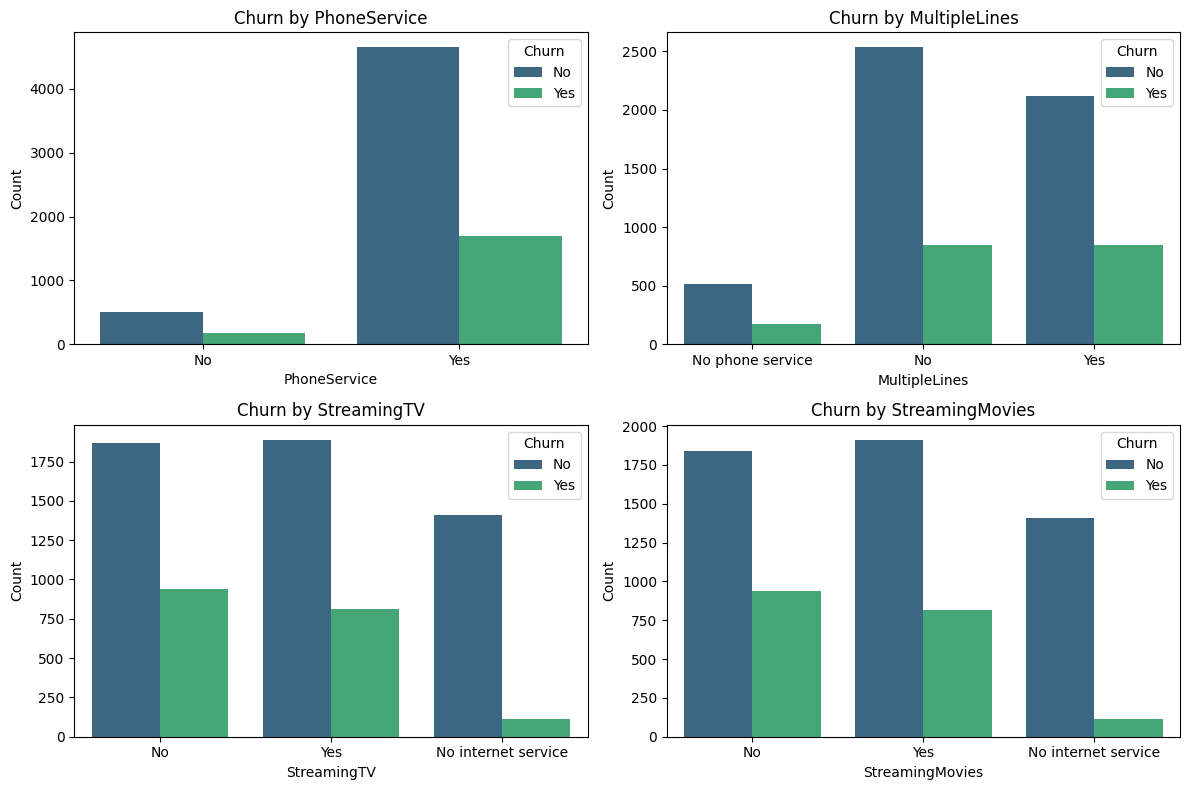

In [ ]:
# Categorical analysis checking out services that have a high rate of Churining
categorical_features = ['PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']

# Determine the number of rows and columns based on the number of features
num_features = len(categorical_features)
num_rows = (num_features - 1) // 2 + 1
num_cols = min(num_features, 2)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))

# Plot churn for each categorical feature
for i, feature in enumerate(categorical_features):
    row_index, col_index = divmod(i, num_cols)
    sns.countplot(x=feature, hue='Churn', data=Telco_df, ax=axes[row_index, col_index], palette='viridis')
    axes[row_index, col_index].set_title(f'Churn by {feature}')
    axes[row_index, col_index].set_xlabel(feature)
    axes[row_index, col_index].set_ylabel('Count')

plt.tight_layout()
plt.show()


Most customers are retained across all the services




---



---



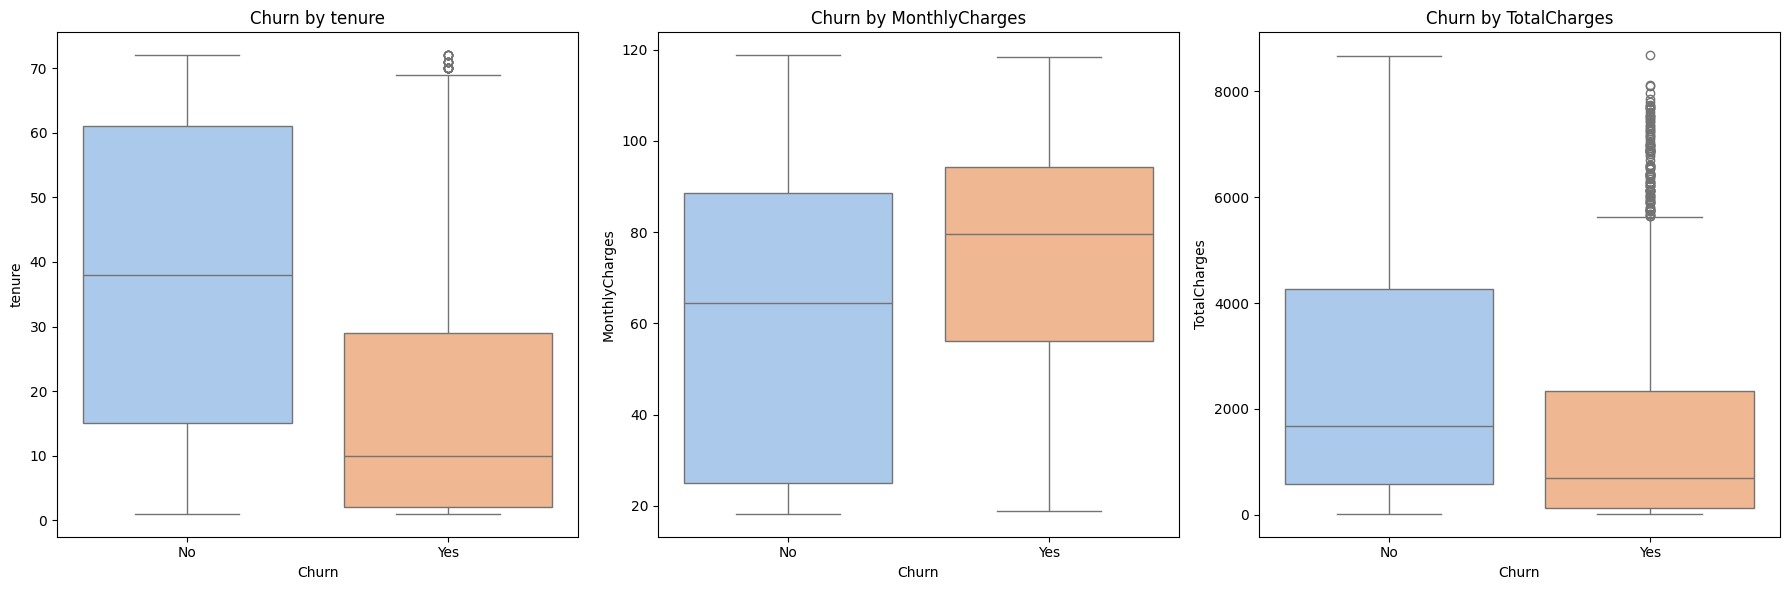

In [ ]:
numerical_columns = Telco_df[['tenure', 'MonthlyCharges','TotalCharges']]

# subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot churn by numerical features
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='Churn', y=column, hue='Churn', data=Telco_df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Churn by {column}')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


* The first boxplot is churn against tenure, We can see the
average churn tenure is 10 months meaning most churned customers leave early.

* Second boxplot, Show most customer churn at the average charge of 80 While the remaining at 60 monthly charges. Most churned Customers spent more in Monthly charges compared to the remain customers.

* Third Boxplot the churning with a lower average totalcharges than the remaing customers, Which could mean loyal customers spend more.






---



---



In this section, we shall explore the relation of customer churn to prominent demographic variables such as Gender, Senior Citizen status and Partner status as well as the presence of Dependents. Each factor will be visualized in the separate plot so that it can see how churn varies within different demographic segments. These insights may be helpful to understand patterns and develop strategies to mitigate churn based on demographic factors.


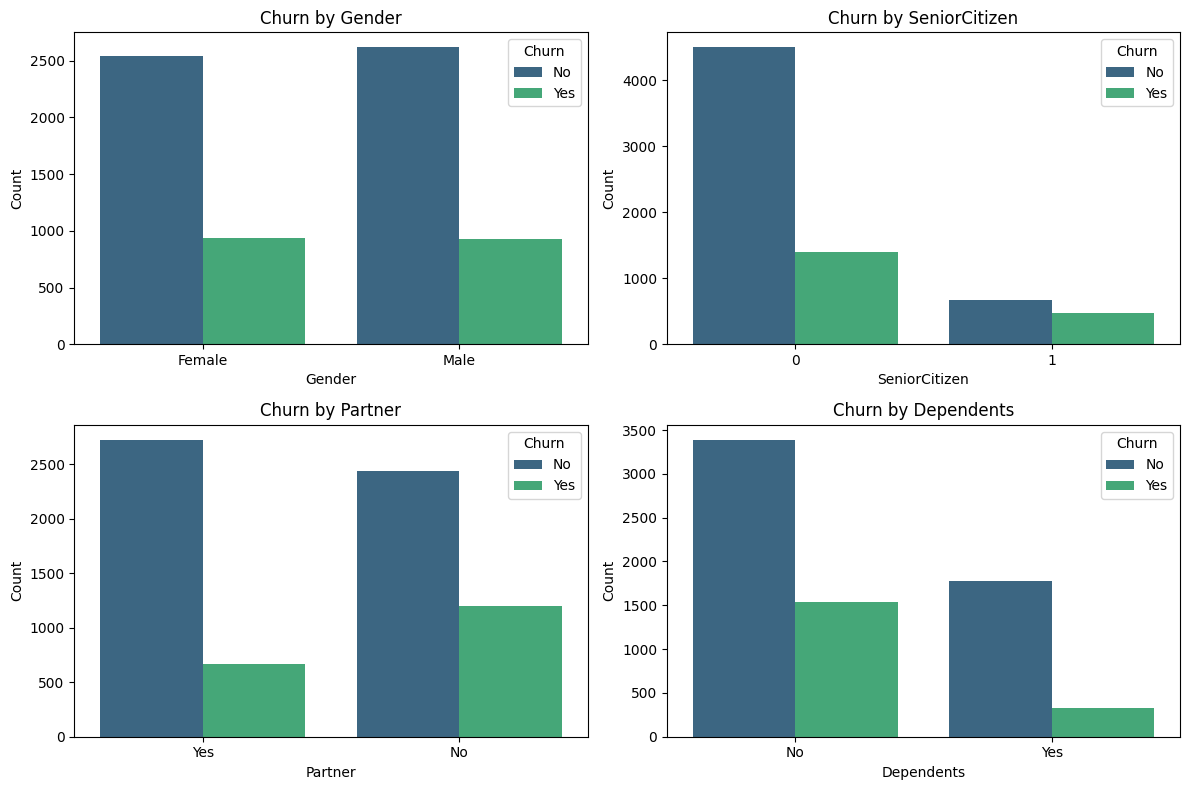

In [ ]:
# Plots for Demographics
# Set up for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot churn for Gender
sns.countplot(x='gender', hue='Churn', data=Telco_df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Churn by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

# Plot churn for Senior Citizen
sns.countplot(x='SeniorCitizen', hue='Churn', data=Telco_df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Churn by SeniorCitizen')
axes[0, 1].set_xlabel('SeniorCitizen')
axes[0, 1].set_ylabel('Count')

# Plot churn for Partner
sns.countplot(x='Partner', hue='Churn', data=Telco_df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Churn by Partner')
axes[1, 0].set_xlabel('Partner')
axes[1, 0].set_ylabel('Count')

# Plot churn for Dependents
sns.countplot(x='Dependents', hue='Churn', data=Telco_df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Churn by Dependents')
axes[1, 1].set_xlabel('Dependents')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In the first plot, Churn by Gender, we observe that there is no significant difference in churn rates between genders. Churning appears to be evenly distributed."

In the second plot, Churn by Senior Citizens, it is noteworthy that the majority of customers leaving are not senior citizens, with figures exceeding 1000.

The third plot, Churn  against Partner, reveals a notable trend. Customers without partners exhibit a higher churn rate compared to those with partners.

In the fourth plot, Dependents against Churn, the data indicates that customers without dependents have a higher likelihood of churning.

**Recomendations**

First, Roll out initiatives for increasing customer engagement especially during the first months of subscription (lower tenure). This could involve creating personalized onboarding experiences, educational material and targeted communication to ease any apprehensions.

Secondly, Evaluate the pricing structure and consider offering competitive pricing plans or giving incentives to high spending customers. Tailoring pricing strategies that match with customer preference and market trends it will help in bettering customer retention

Thirdly, Enable loyalty programmes or exclusive offering for long-held customers. Customer recognition and rewarding customer loyalty can encourage the feeling of being appreciated as well as foster continued commitment.

Laslty, Improve communication ways to deal with the complaint of the customer, regular update and improvement on an advance plan of support. Communication regarding changes made and updates of services as well as potential benefits shall improve customers' satisfaction.




---



---



# Modeling: Predictive Modeling for Customer Churn

**Probability of a customer to Churn**

In [ ]:

Telco_df.drop(columns=['customerID'], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the list of categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
Telco_df[categorical_columns] = Telco_df[categorical_columns].apply(encoder.fit_transform)

# Display the encoded DataFrame
print(Telco_df.head())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Preprocessing the data
X = Telco_df.drop(columns=['Churn'])
y = Telco_df['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7853589196872779

Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407


Confusion Matrix:
[[920 113]
 [189 185]]


**Accuracy:** The overall accuracy achieved in this test was 78.54%, that is, the percentage of cases when a model made the correct prediction. ⁤



**⁤Classification Report: ⁤**



**Precision:** The precision score is 83% in the sense of predicting "No" churn, which further means that among all instances predicted as "No" churn, 83% were actually the true cases of "No" churn. And for the prediction of "Yes" churn, there is a precision score of 62% because among all instances predicted as "Yes" churn, 62% were actually true cases of "Yes" churn. ⁤



**Recall:** Predicting churn as "No" will give a recall of 89%, which means that the model correctly captured the churn value in 89% of the actual cases having "No" churn. The recall of churn as "Yes" comes out to be 49%, which means the model captures only 49% of the churn cases as "Yes."



**F1-Score:** F1-Score is the harmonic mean of precision and recall. The measure balances the two and gives an overall picture. The F1-score of the weighted average is 0.78. ⁤



**Support:** They will be the number of instances of each class in the test set. ⁤⁤The test set contains 1033 instances that are "No" churn and 374 instances that are "Yes" churn. ⁤



**⁤Confusion Matrix:** ⁤



⁤This is a summary of the model's predictions on a set of data compared to the actual ground-truth labels. ⁤



There are four values: true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP). ⁤



⁤The confusion matrix takes the following form: ⁤



⁤[[920 113] ⁤

⁤[189 185]] ⁤



⁤920 instances were predicted as correctly "No" churn

113 instances were wrong prediction in "Yes" churn (False Positive, FP).

189 instances were wrongly predicted as "No" churn (False Negative, FN).

185 instances were right prediction in "Yes" churn (True Positive, TP).


However, on average, while the model is relatively well-performing in attaining high accuracy, it seems to miss the most in correct predictions in the case of "Yes" churn instances, which is supported by a relatively low recall and precision for this class. ⁤⁤This should indicate an area of future improvement on the model. Therefore I had to this next step.